Aquí estamos importando el dataset que vamos a utilizar de sklearn, imprimimos los nombres de las personas y la cantidad de fotos contra sus respectivas medidas.

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Luego creamos un ciclo for para poder imprimir cada una de las imagenes de las personas con un acomodo de 3 x 5

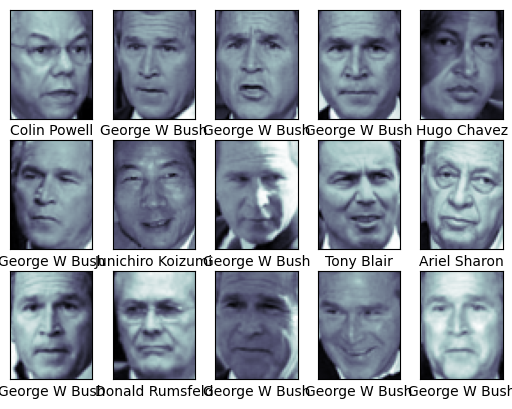

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

- Aquí estamomos importando la librería para SVC la cual es para las máquinas de soporte, al igual que la librería para PCA la cual nos va a ayudar con la reducción de la dimensionalidad lineal utilizando la descomposición en valores singulares aproximada de los datos y manteniendo solo los vectores singulares más significativos para proyectar los datos a un espacio de menor dimensión, y por último la librería de Pipeline. [1]

- Le damos a cada función su los datos requeridos y hacemos un pipeline para unir el model *svc* y la transformación *pca*

[1]sklearn.decomposition.RandomizedPCA — documentación de scikit-learn 0.15-git. (n.d.). https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.RandomizedPCA.html

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Aquí solo separamos los datos en train, test y split.

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

Ahora importamos la librería GridSearchCV la cual es una herramienta que permite encontrar la mejor combinación de hiperparámetros para un modelo [2], para entonces darle los parámetros que queremos combinar, encontramos la mejor combinación y la imprimimos.

[2]GridSearchCV. (n.d.). Scikit-learn. https://scikit--learn-org.translate.goog/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=tc

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 1min 51s
Wall time: 1min 44s
{'svc__C': 5, 'svc__gamma': 0.001}


Aquí estamos definiendo el modelo con los mejores paramentros que encontramos arriba y prediciendo con nuestra Xtest

In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Aquí graficamos las predicciones que hicimos (yfit) y si predijo bien quien era la persona sale en negro el nombre y si se equivoco sale en rojo

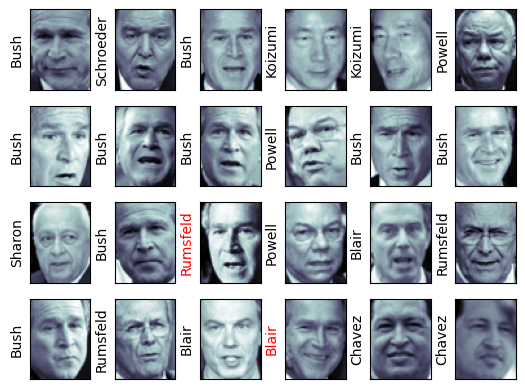

In [13]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
plt.show()

Luego importamos la librería de classificatio_report para poder presentar el análisis de nuestros métricos contra los valores de predicción según la persona.

In [8]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Y ahora vemos lo mismo pero con un heatmap y vemos cuantas veces realmente atino el modelo a la persona correcta o con que otra persona lo confundio.

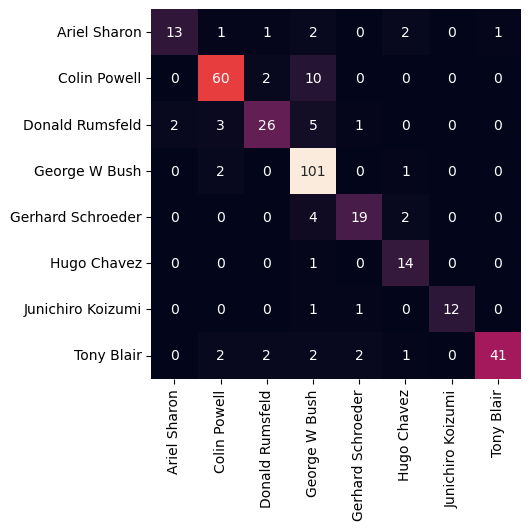

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.show()

**********************************************************************************

In [21]:
from sklearn import datasets, metrics, svm
from sklearn.neural_network import MLPClassifier

In [17]:
digits = datasets.load_digits()

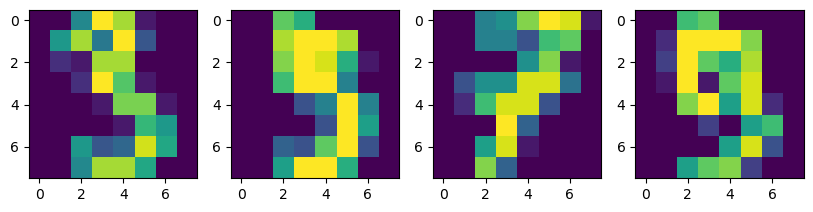

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
%matplotlib inline
axes[0].imshow(digits.images[3, :, :])
axes[1].imshow(digits.images[5, :, :])
axes[2].imshow(digits.images[7, :, :])
axes[3].imshow(digits.images[9, :, :])
plt.show()

In [20]:
data = digits.images.reshape([1797, -1])

In [ ]:
for i in range():
    [(i + i+1)]

In [22]:
param_grid = {'primera': [2, 4, 6],
              'segunda': [3, 5, 7]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

ValueError: Invalid parameter 'primera' for estimator Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.001))]). Valid parameters are: ['memory', 'steps', 'verbose'].

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
MLP = MLPClassifier(random_state = 1,
                      hidden_layer_sizes = hidden_layers,
                      max_iter = 1000)
model = make_pipeline(pca, svc)